In [1]:
%config Completer.use_jedi = False
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from RobotDynamic import *

[ 0.00073358 -0.01552532]
[0.00024157]
[ 0.00073358 -0.01552532]
[0.00024157]
[ 0.00073358 -0.01552532]
[0.00024157]
[ 0.00073358 -0.01552532]
[0.00024157]
[ 0.00073358 -0.01552532]
[0.00024157]
[ 0.00073358 -0.01552532]
[0.00024157]
[ 0.00073358 -0.01552532]
[0.00024157]
[ 0.00073097 -0.01546996]
[0.00023985]
[ 0.00073097 -0.01546996]
[0.00023985]
[ 0.00073097 -0.01546996]
[0.00023985]
[ 0.00073097 -0.01546996]
[0.00023985]
[ 0.00073097 -0.01546996]
[0.00023985]
[ 0.00073097 -0.01546996]
[0.00023985]
[ 0.00073097 -0.01546996]
[0.00023985]
[ 0.00072838 -0.01541515]
[0.00023816]
[ 0.00072838 -0.01541515]
[0.00023816]
[ 0.00072838 -0.01541515]
[0.00023816]
[ 0.00072838 -0.01541515]
[0.00023816]
[ 0.00072838 -0.01541515]
[0.00023816]
[ 0.00072838 -0.01541515]
[0.00023816]
[ 0.00072838 -0.01541515]
[0.00023816]
[ 0.00072581 -0.01536088]
[0.00023648]
[ 0.00072581 -0.01536088]
[0.00023648]
[ 0.00072581 -0.01536088]
[0.00023648]
[ 0.00072581 -0.01536088]
[0.00023648]
[ 0.00072581 -0.01536088]

[ 0.00062099 -0.01314243]
[0.00017311]
[ 0.0006195 -0.0131109]
[0.00017228]
[ 0.0006195 -0.0131109]
[0.00017228]
[ 0.0006195 -0.0131109]
[0.00017228]
[ 0.0006195 -0.0131109]
[0.00017228]
[ 0.0006195 -0.0131109]
[0.00017228]
[ 0.0006195 -0.0131109]
[0.00017228]
[ 0.0006195 -0.0131109]
[0.00017228]
[ 0.00061802 -0.01307968]
[0.00017146]
[ 0.00061802 -0.01307968]
[0.00017146]
[ 0.00061802 -0.01307968]
[0.00017146]
[ 0.00061802 -0.01307968]
[0.00017146]
[ 0.00061802 -0.01307968]
[0.00017146]
[ 0.00061802 -0.01307968]
[0.00017146]
[ 0.00061802 -0.01307968]
[0.00017146]
[ 0.00061656 -0.01304877]
[0.00017065]
[ 0.00061656 -0.01304877]
[0.00017065]
[ 0.00061656 -0.01304877]
[0.00017065]
[ 0.00061656 -0.01304877]
[0.00017065]
[ 0.00061656 -0.01304877]
[0.00017065]
[ 0.00061656 -0.01304877]
[0.00017065]
[ 0.00061656 -0.01304877]
[0.00017065]
[ 0.00061512 -0.01301817]
[0.00016985]
[ 0.00061512 -0.01301817]
[0.00016985]
[ 0.00061512 -0.01301817]
[0.00016985]
[ 0.00061512 -0.01301817]
[0.00016985]


[ 0.00054797 -0.01159714]
[0.00013479]
[ 0.00054797 -0.01159714]
[0.00013479]
[ 0.00054797 -0.01159714]
[0.00013479]
[ 0.00054721 -0.01158105]
[0.00013442]
[ 0.00054721 -0.01158105]
[0.00013442]
[ 0.00054721 -0.01158105]
[0.00013442]
[ 0.00054721 -0.01158105]
[0.00013442]
[ 0.00054721 -0.01158105]
[0.00013442]
[ 0.00054721 -0.01158105]
[0.00013442]
[ 0.00054721 -0.01158105]
[0.00013442]
[ 0.00054646 -0.01156513]
[0.00013405]
[ 0.00054646 -0.01156513]
[0.00013405]
[ 0.00054646 -0.01156513]
[0.00013405]
[ 0.00054646 -0.01156513]
[0.00013405]
[ 0.00054646 -0.01156513]
[0.00013405]
[ 0.00054646 -0.01156513]
[0.00013405]
[ 0.00054646 -0.01156513]
[0.00013405]
[ 0.00054572 -0.01154937]
[0.00013369]
[ 0.00054572 -0.01154937]
[0.00013369]
[ 0.00054572 -0.01154937]
[0.00013369]
[ 0.00054572 -0.01154937]
[0.00013369]
[ 0.00054572 -0.01154937]
[0.00013369]
[ 0.00054572 -0.01154937]
[0.00013369]
[ 0.00054572 -0.01154937]
[0.00013369]
[ 0.00054498 -0.01153376]
[0.00013332]
[ 0.00054498 -0.01153376]

[0.00011623]
[ 0.00050884 -0.01076886]
[0.00011623]
[ 0.00050847 -0.01076106]
[0.00011606]
[ 0.00050847 -0.01076106]
[0.00011606]
[ 0.00050847 -0.01076106]
[0.00011606]
[ 0.00050847 -0.01076106]
[0.00011606]
[ 0.00050847 -0.01076106]
[0.00011606]
[ 0.00050847 -0.01076106]
[0.00011606]
[ 0.00050847 -0.01076106]
[0.00011606]
[ 0.0005081  -0.01075334]
[0.00011589]
[ 0.0005081  -0.01075334]
[0.00011589]
[ 0.0005081  -0.01075334]
[0.00011589]
[ 0.0005081  -0.01075334]
[0.00011589]
[ 0.0005081  -0.01075334]
[0.00011589]
[ 0.0005081  -0.01075334]
[0.00011589]
[ 0.0005081  -0.01075334]
[0.00011589]
[ 0.00050774 -0.01074569]
[0.00011573]
[ 0.00050774 -0.01074569]
[0.00011573]
[ 0.00050774 -0.01074569]
[0.00011573]
[ 0.00050774 -0.01074569]
[0.00011573]
[ 0.00050774 -0.01074569]
[0.00011573]
[ 0.00050774 -0.01074569]
[0.00011573]
[ 0.00050774 -0.01074569]
[0.00011573]
[ 0.00050738 -0.01073812]
[0.00011556]
[ 0.00050738 -0.01073812]
[0.00011556]
[ 0.00050738 -0.01073812]
[0.00011556]
[ 0.00050738

[ 0.00048985 -0.01036715]
[0.00010772]
[ 0.00048985 -0.01036715]
[0.00010772]
[ 0.00048985 -0.01036715]
[0.00010772]
[ 0.00048985 -0.01036715]
[0.00010772]
[ 0.00048968 -0.01036337]
[0.00010764]
[ 0.00048968 -0.01036337]
[0.00010764]
[ 0.00048968 -0.01036337]
[0.00010764]
[ 0.00048968 -0.01036337]
[0.00010764]
[ 0.00048968 -0.01036337]
[0.00010764]
[ 0.00048968 -0.01036337]
[0.00010764]
[ 0.00048968 -0.01036337]
[0.00010764]
[ 0.0004895  -0.01035962]
[0.00010756]
[ 0.0004895  -0.01035962]
[0.00010756]
[ 0.0004895  -0.01035962]
[0.00010756]
[ 0.0004895  -0.01035962]
[0.00010756]
[ 0.0004895  -0.01035962]
[0.00010756]
[ 0.0004895  -0.01035962]
[0.00010756]
[ 0.0004895  -0.01035962]
[0.00010756]
[ 0.00048932 -0.01035591]
[0.00010748]
[ 0.00048932 -0.01035591]
[0.00010748]
[ 0.00048932 -0.01035591]
[0.00010748]
[ 0.00048932 -0.01035591]
[0.00010748]
[ 0.00048932 -0.01035591]
[0.00010748]
[ 0.00048932 -0.01035591]
[0.00010748]
[ 0.00048932 -0.01035591]
[0.00010748]
[ 0.00048915 -0.01035224]

[ 0.00048022 -0.01016333]
[0.00010352]
[ 0.00048022 -0.01016333]
[0.00010352]
[ 0.00048022 -0.01016333]
[0.00010352]
[ 0.00048022 -0.01016333]
[0.00010352]
[ 0.00048014 -0.01016159]
[0.00010349]
[ 0.00048014 -0.01016159]
[0.00010349]
[ 0.00048014 -0.01016159]
[0.00010349]
[ 0.00048014 -0.01016159]
[0.00010349]
[ 0.00048014 -0.01016159]
[0.00010349]
[ 0.00048014 -0.01016159]
[0.00010349]
[ 0.00048014 -0.01016159]
[0.00010349]
[ 0.00048006 -0.01015986]
[0.00010345]
[ 0.00048006 -0.01015986]
[0.00010345]
[ 0.00048006 -0.01015986]
[0.00010345]
[ 0.00048006 -0.01015986]
[0.00010345]
[ 0.00048006 -0.01015986]
[0.00010345]
[ 0.00048006 -0.01015986]
[0.00010345]
[ 0.00048006 -0.01015986]
[0.00010345]
[ 0.00047998 -0.01015815]
[0.00010342]
[ 0.00047998 -0.01015815]
[0.00010342]
[ 0.00047998 -0.01015815]
[0.00010342]
[ 0.00047998 -0.01015815]
[0.00010342]
[ 0.00047998 -0.01015815]
[0.00010342]
[ 0.00047998 -0.01015815]
[0.00010342]
[ 0.00047998 -0.01015815]
[0.00010342]
[ 0.0004799  -0.01015646]

[ 0.00047586 -0.01007096]
[0.00010165]
[ 0.00047586 -0.01007096]
[0.00010165]
[ 0.00047586 -0.01007096]
[0.00010165]
[ 0.00047582 -0.01007014]
[0.00010163]
[ 0.00047582 -0.01007014]
[0.00010163]
[ 0.00047582 -0.01007014]
[0.00010163]
[ 0.00047582 -0.01007014]
[0.00010163]
[ 0.00047582 -0.01007014]
[0.00010163]
[ 0.00047582 -0.01007014]
[0.00010163]
[ 0.00047582 -0.01007014]
[0.00010163]
[ 0.00047578 -0.01006933]
[0.00010162]
[ 0.00047578 -0.01006933]
[0.00010162]
[ 0.00047578 -0.01006933]
[0.00010162]
[ 0.00047578 -0.01006933]
[0.00010162]
[ 0.00047578 -0.01006933]
[0.00010162]
[ 0.00047578 -0.01006933]
[0.00010162]
[ 0.00047578 -0.01006933]
[0.00010162]
[ 0.00047574 -0.01006852]
[0.0001016]
[ 0.00047574 -0.01006852]
[0.0001016]
[ 0.00047574 -0.01006852]
[0.0001016]
[ 0.00047574 -0.01006852]
[0.0001016]
[ 0.00047574 -0.01006852]
[0.0001016]
[ 0.00047574 -0.01006852]
[0.0001016]
[ 0.00047574 -0.01006852]
[0.0001016]
[ 0.00047571 -0.01006773]
[0.00010159]
[ 0.00047571 -0.01006773]
[0.000

[ 0.00047372 -0.0100256 ]
[0.00010074]
[ 0.0004737  -0.01002523]
[0.00010073]
[ 0.0004737  -0.01002523]
[0.00010073]
[ 0.0004737  -0.01002523]
[0.00010073]
[ 0.0004737  -0.01002523]
[0.00010073]
[ 0.0004737  -0.01002523]
[0.00010073]
[ 0.0004737  -0.01002523]
[0.00010073]
[ 0.0004737  -0.01002523]
[0.00010073]
[ 0.00047368 -0.01002487]
[0.00010072]
[ 0.00047368 -0.01002487]
[0.00010072]
[ 0.00047368 -0.01002487]
[0.00010072]
[ 0.00047368 -0.01002487]
[0.00010072]
[ 0.00047368 -0.01002487]
[0.00010072]
[ 0.00047368 -0.01002487]
[0.00010072]
[ 0.00047368 -0.01002487]
[0.00010072]
[ 0.00047366 -0.01002451]
[0.00010072]
[ 0.00047366 -0.01002451]
[0.00010072]
[ 0.00047366 -0.01002451]
[0.00010072]
[ 0.00047366 -0.01002451]
[0.00010072]
[ 0.00047366 -0.01002451]
[0.00010072]
[ 0.00047366 -0.01002451]
[0.00010072]
[ 0.00047366 -0.01002451]
[0.00010072]
[ 0.00047365 -0.01002415]
[0.00010071]
[ 0.00047365 -0.01002415]
[0.00010071]
[ 0.00047365 -0.01002415]
[0.00010071]
[ 0.00047365 -0.01002415]

[ 0.00047273 -0.01000481]
[0.00010032]
[ 0.00047273 -0.01000481]
[0.00010032]
[ 0.00047273 -0.01000481]
[0.00010032]
[ 0.00047273 -0.01000481]
[0.00010032]
[ 0.00047273 -0.01000481]
[0.00010032]
[ 0.00047273 -0.01000481]
[0.00010032]
[ 0.00047273 -0.01000481]
[0.00010032]
[ 0.00047273 -0.01000465]
[0.00010032]
[ 0.00047273 -0.01000465]
[0.00010032]
[ 0.00047273 -0.01000465]
[0.00010032]
[ 0.00047273 -0.01000465]
[0.00010032]
[ 0.00047273 -0.01000465]
[0.00010032]
[ 0.00047273 -0.01000465]
[0.00010032]
[ 0.00047273 -0.01000465]
[0.00010032]
[ 0.00047272 -0.01000449]
[0.00010031]
[ 0.00047272 -0.01000449]
[0.00010031]
[ 0.00047272 -0.01000449]
[0.00010031]
[ 0.00047272 -0.01000449]
[0.00010031]
[ 0.00047272 -0.01000449]
[0.00010031]
[ 0.00047272 -0.01000449]
[0.00010031]
[ 0.00047272 -0.01000449]
[0.00010031]
[ 0.00047271 -0.01000434]
[0.00010031]
[ 0.00047271 -0.01000434]
[0.00010031]
[ 0.00047271 -0.01000434]
[0.00010031]
[ 0.00047271 -0.01000434]
[0.00010031]
[ 0.00047271 -0.01000434]

[ 0.00047231 -0.00999585]
[0.00010014]
[ 0.00047231 -0.00999585]
[0.00010014]
[ 0.00047231 -0.00999585]
[0.00010014]
[ 0.00047231 -0.00999578]
[0.00010014]
[ 0.00047231 -0.00999578]
[0.00010014]
[ 0.00047231 -0.00999578]
[0.00010014]
[ 0.00047231 -0.00999578]
[0.00010014]
[ 0.00047231 -0.00999578]
[0.00010014]
[ 0.00047231 -0.00999578]
[0.00010014]
[ 0.00047231 -0.00999578]
[0.00010014]
[ 0.0004723  -0.00999571]
[0.00010014]
[ 0.0004723  -0.00999571]
[0.00010014]
[ 0.0004723  -0.00999571]
[0.00010014]
[ 0.0004723  -0.00999571]
[0.00010014]
[ 0.0004723  -0.00999571]
[0.00010014]
[ 0.0004723  -0.00999571]
[0.00010014]
[ 0.0004723  -0.00999571]
[0.00010014]
[ 0.0004723  -0.00999565]
[0.00010014]
[ 0.0004723  -0.00999565]
[0.00010014]
[ 0.0004723  -0.00999565]
[0.00010014]
[ 0.0004723  -0.00999565]
[0.00010014]
[ 0.0004723  -0.00999565]
[0.00010014]
[ 0.0004723  -0.00999565]
[0.00010014]
[ 0.0004723  -0.00999565]
[0.00010014]
[ 0.0004723  -0.00999558]
[0.00010013]
[ 0.0004723  -0.00999558]

[ 0.00047212 -0.00999183]
[0.00010006]
[ 0.00047212 -0.00999183]
[0.00010006]
[ 0.00047212 -0.00999183]
[0.00010006]
[ 0.00047212 -0.00999183]
[0.00010006]
[ 0.00047212 -0.00999183]
[0.00010006]
[ 0.00047212 -0.00999183]
[0.00010006]
[ 0.00047212 -0.0099918 ]
[0.00010006]
[ 0.00047212 -0.0099918 ]
[0.00010006]
[ 0.00047212 -0.0099918 ]
[0.00010006]
[ 0.00047212 -0.0099918 ]
[0.00010006]
[ 0.00047212 -0.0099918 ]
[0.00010006]
[ 0.00047212 -0.0099918 ]
[0.00010006]
[ 0.00047212 -0.0099918 ]
[0.00010006]
[ 0.00047212 -0.00999177]
[0.00010006]
[ 0.00047212 -0.00999177]
[0.00010006]
[ 0.00047212 -0.00999177]
[0.00010006]
[ 0.00047212 -0.00999177]
[0.00010006]
[ 0.00047212 -0.00999177]
[0.00010006]
[ 0.00047212 -0.00999177]
[0.00010006]
[ 0.00047212 -0.00999177]
[0.00010006]
[ 0.00047212 -0.00999175]
[0.00010006]
[ 0.00047212 -0.00999175]
[0.00010006]
[ 0.00047212 -0.00999175]
[0.00010006]
[ 0.00047212 -0.00999175]
[0.00010006]
[ 0.00047212 -0.00999175]
[0.00010006]
[ 0.00047212 -0.00999175]

[0.00010003]
[ 0.00047204 -0.00999015]
[0.00010003]
[ 0.00047204 -0.00999015]
[0.00010003]
[ 0.00047204 -0.00999015]
[0.00010003]
[ 0.00047204 -0.00999015]
[0.00010003]
[ 0.00047204 -0.00999015]
[0.00010003]
[ 0.00047204 -0.00999014]
[0.00010003]
[ 0.00047204 -0.00999014]
[0.00010003]
[ 0.00047204 -0.00999014]
[0.00010003]
[ 0.00047204 -0.00999014]
[0.00010003]
[ 0.00047204 -0.00999014]
[0.00010003]
[ 0.00047204 -0.00999014]
[0.00010003]
[ 0.00047204 -0.00999014]
[0.00010003]
[ 0.00047204 -0.00999012]
[0.00010003]
[ 0.00047204 -0.00999012]
[0.00010003]
[ 0.00047204 -0.00999012]
[0.00010003]
[ 0.00047204 -0.00999012]
[0.00010003]
[ 0.00047204 -0.00999012]
[0.00010003]
[ 0.00047204 -0.00999012]
[0.00010003]
[ 0.00047204 -0.00999012]
[0.00010003]
[ 0.00047204 -0.00999011]
[0.00010003]
[ 0.00047204 -0.00999011]
[0.00010003]
[ 0.00047204 -0.00999011]
[0.00010003]
[ 0.00047204 -0.00999011]
[0.00010003]
[ 0.00047204 -0.00999011]
[0.00010003]
[ 0.00047204 -0.00999011]
[0.00010003]
[ 0.00047204

[ 0.00047201 -0.00998942]
[0.00010001]
[ 0.00047201 -0.00998942]
[0.00010001]
[ 0.00047201 -0.00998942]
[0.00010001]
[ 0.00047201 -0.00998942]
[0.00010001]
[ 0.00047201 -0.00998942]
[0.00010001]
[ 0.00047201 -0.00998942]
[0.00010001]
[ 0.00047201 -0.00998942]
[0.00010001]
[ 0.00047201 -0.00998942]
[0.00010001]
[ 0.00047201 -0.00998942]
[0.00010001]
[ 0.00047201 -0.00998942]
[0.00010001]
[ 0.00047201 -0.00998941]
[0.00010001]
[ 0.00047201 -0.00998941]
[0.00010001]
[ 0.00047201 -0.00998941]
[0.00010001]
[ 0.00047201 -0.00998941]
[0.00010001]
[ 0.00047201 -0.00998941]
[0.00010001]
[ 0.00047201 -0.00998941]
[0.00010001]
[ 0.00047201 -0.00998941]
[0.00010001]
[ 0.00047201 -0.00998941]
[0.00010001]
[ 0.00047201 -0.00998941]
[0.00010001]
[ 0.00047201 -0.00998941]
[0.00010001]
[ 0.00047201 -0.00998941]
[0.00010001]
[ 0.00047201 -0.00998941]
[0.00010001]
[ 0.00047201 -0.00998941]
[0.00010001]
[ 0.00047201 -0.00998941]
[0.00010001]
[ 0.00047201 -0.0099894 ]
[0.00010001]
[ 0.00047201 -0.0099894 ]

[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.0099891 ]
[0.0001]
[ 0.00047199 -0.00998909]
[0.0001]
[ 0.00047199 -0.00998909]
[0.0001]
[ 0.00047199 -0.00998909]
[0.0001]
[ 0.00047199 -0.00998909]
[0.0001]
[ 0.00047199 -0.00998909]
[0.0001]
[ 0.00047199 -0.00998909]
[0.0001]
[ 0.00047199 -0.00998909]
[0.0001]
[ 0.00047199 -0.00998909]
[0.0001]
[ 0.00047199 -0.00998909]
[0.0001]
[ 0.00047199 -0.0099

[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.00998896]
[0.0001]
[ 0.00047198 -0.0099

[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099889 ]
[0.0001]
[ 0.00047198 -0.0099

[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.00998888]
[0.0001]
[ 0.00047198 -0.0099

[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998887]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.0099

[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.0099

[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.0099

[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.0099

[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.0099

[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.0099

[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.0099

[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.0099

[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.00998886]
[0.0001]
[ 0.00047198 -0.0099

<IPython.core.display.Javascript object>


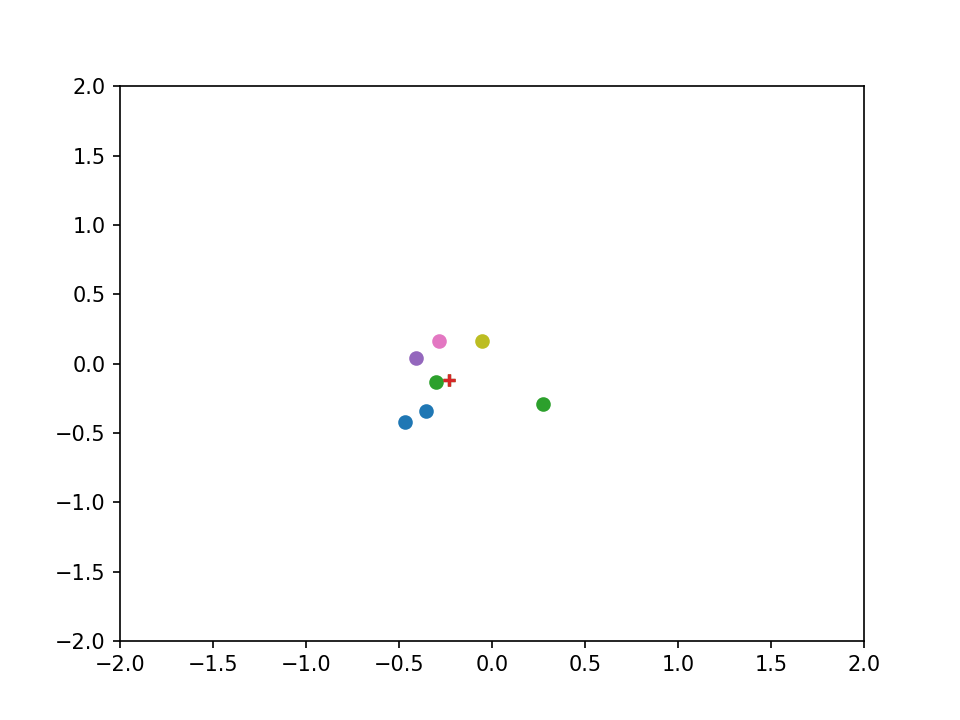

<IPython.core.display.Javascript object>


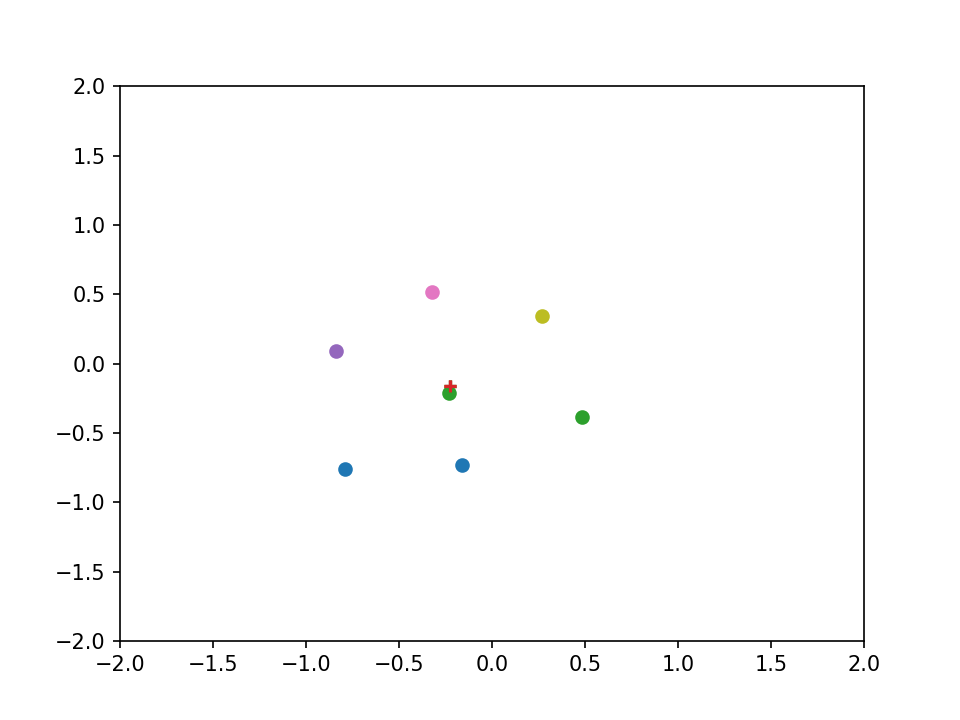

<IPython.core.display.Javascript object>


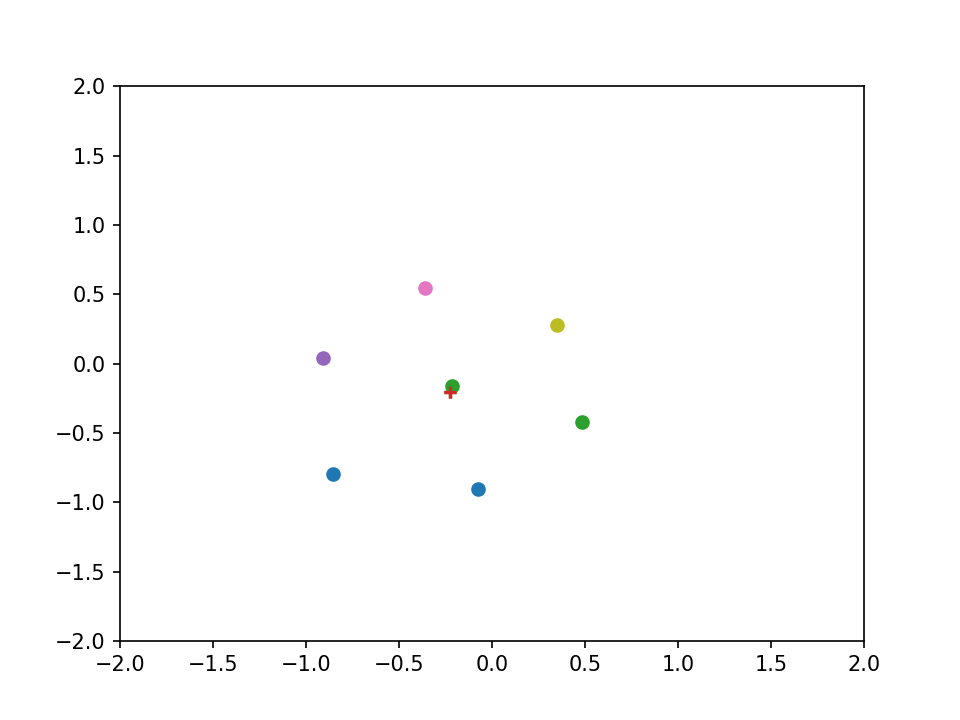

<IPython.core.display.Javascript object>


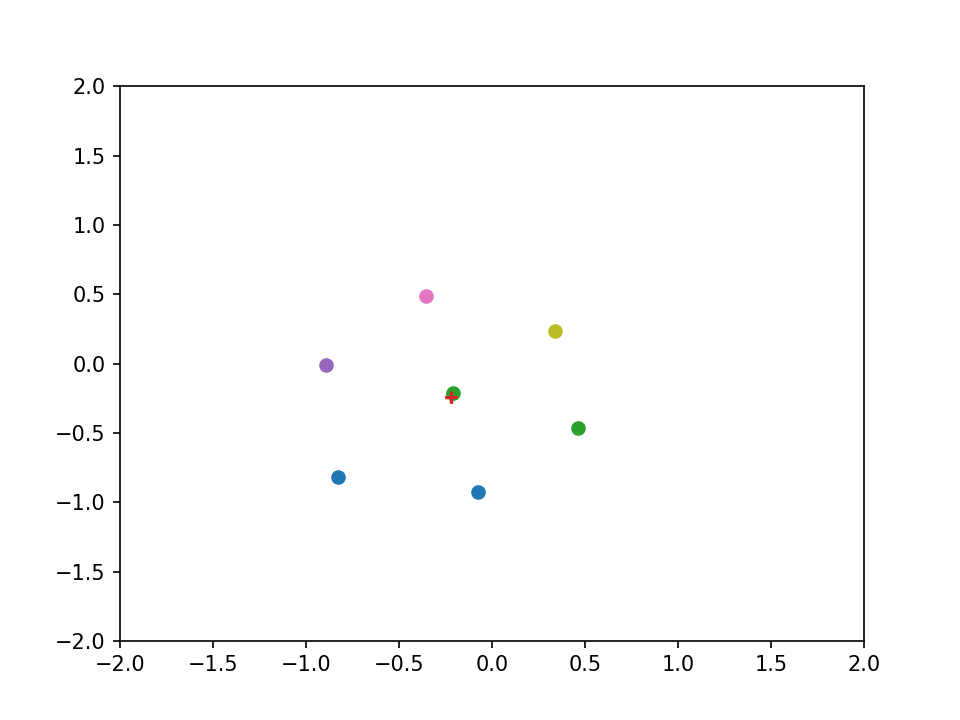

<IPython.core.display.Javascript object>


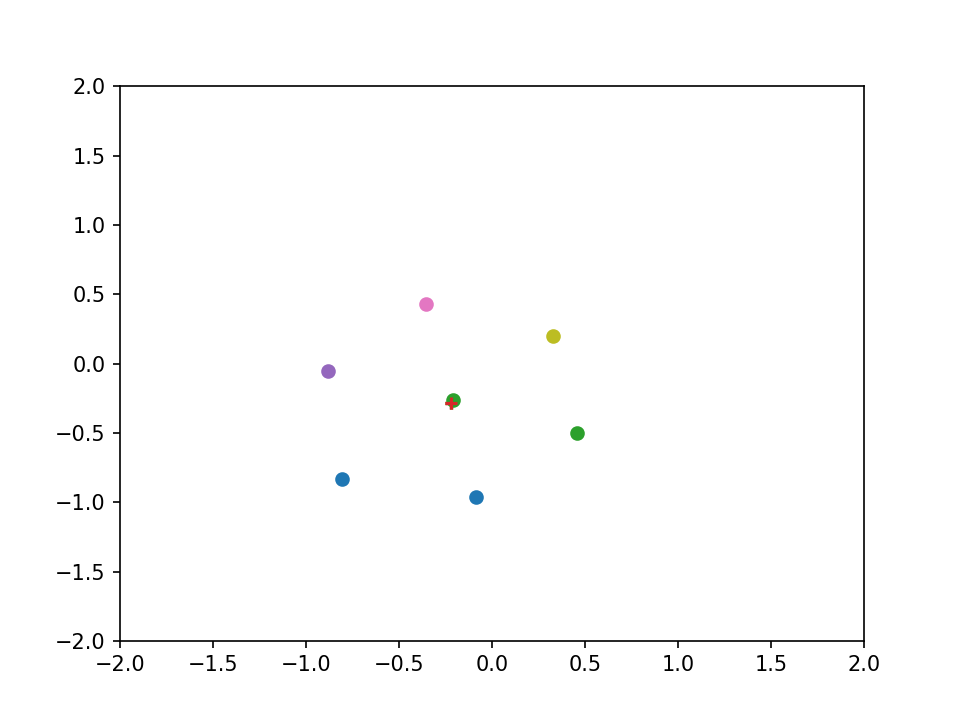

<IPython.core.display.Javascript object>


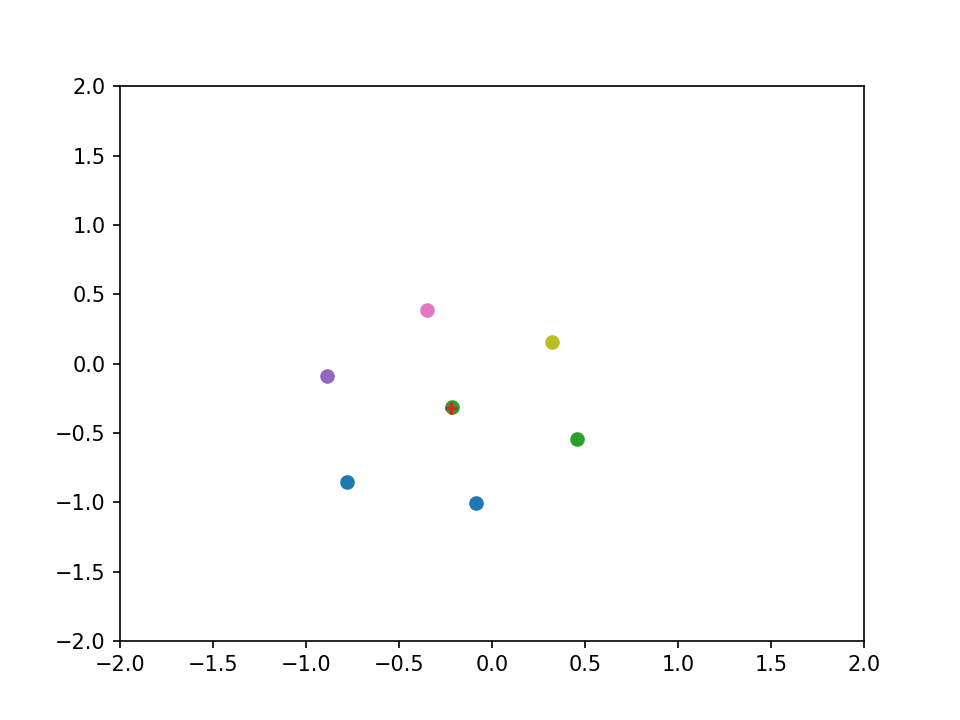

<IPython.core.display.Javascript object>


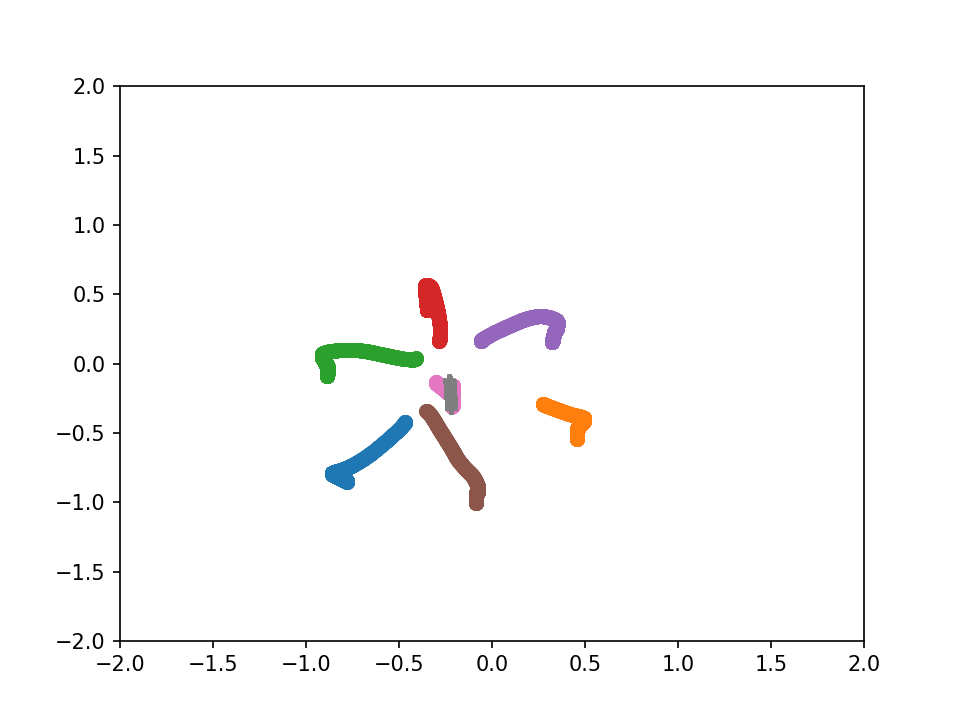

In [33]:
d_sep = .5
N = 2000
nbrob = 7
plot_lim = 2

d_start = 1
v_start = 0.1

γ = 1
γs = 0.1
γc = 0.01
γa = 0.01

def Simul2D(sys):
    Xs = np.ones((nbrob,4,N))
    Us = np.zeros((nbrob,2,N-1))
    Cs = np.zeros((2,N-1))
    Vs = np.zeros((2,N-1))

    for i in range(nbrob):
        Xs[i] = np.array([np.ones(N)*((np.random.rand()-0.5)*v_start),
                          np.ones(N)*((np.random.rand()-0.5)*v_start),
                          np.ones(N)*((np.random.rand()-0.5)*d_start), #x
                          np.ones(N)*((np.random.rand()-0.5)*d_start)]) #y
    
    for k in range(N-1):
        # Cohesion
        for j in range(nbrob):
            Cs[:,k] += Xs[j,2:,k]/nbrob
            
        # Alignment
        for j in range(nbrob):
            Vs[:,k] += Xs[j,0:2,k]/nbrob
            
        for i in range(nbrob):
            # Separation
            for j in range(nbrob):
                if i == j:
                    continue
                if ((Xs[i,2,k]-Xs[j,2,k])**2 + (Xs[i,3,k]-Xs[j,3,k])**2) < d_sep:
                    vec = (Xs[i,2:,k] - Xs[j,2:,k])
                    Us[i,:,k] += γs*(Xs[i,2:,k] - Xs[j,2:,k])/(vec@np.reshape(vec,(2,1)))*d_sep/2
                
            Us[i,:,k] += γc*(Cs[:,k] - Xs[i,2:,k])
            
            Us[i,:,k] += γa*(Vs[:,k]/(np.sqrt(Vs[:,k]@np.reshape(Vs[:,k],(2,1)))))
            
            print(Vs[:,k])
            print((Vs[:,k]@np.reshape(Vs[:,k],(2,1))))
            
            Xs[i,:,k+1] = sys(Xs[i,:,k],γ*Us[i,:,k]).T
    
    for k in range(0,N,int(N/5)):
        plt.figure()
        for i in range(nbrob):
            plt.scatter(Xs[i,2,k],Xs[i,3,k])
            plt.scatter(Cs[0,k],Cs[1,k],marker='+')
        plt.xlim([-plot_lim, plot_lim])
        plt.ylim([-plot_lim, plot_lim])
    plt.figure()
    for i in range(nbrob):
        plt.scatter(Xs[i,2,-1],Xs[i,3,-1])
        plt.scatter(Cs[0,-1],Cs[1,-1],marker='+')
    plt.xlim([-plot_lim, plot_lim])
    plt.ylim([-plot_lim, plot_lim])
    plt.show()
    
    plt.figure()
    for i in range(nbrob):
        plt.scatter(Xs[i,2,:],Xs[i,3,:])
    plt.scatter(Cs[0,:],Cs[1,:],marker='+')
    plt.xlim([-plot_lim, plot_lim])
    plt.ylim([-plot_lim, plot_lim])
    plt.show()

Simul2D(DroneSys)

In [31]:
a = np.array([ 0.00949047,-0.00315134])
b = np.array([ [0.00949047],[-0.00315134]])
a = a/np.sqrt(a@b)
b = np.reshape(a,(2,1))
a@b

array([1.])